# K Nearest Neighbor Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
# List the columns
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [4]:
df["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [5]:
target_names = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [6]:
# Remove error columns
# COMMENT THIS OUT TO RUN USING THE ENTIRE DATAFRAME
df = df[['koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'  ]]

df

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929,176.40,8.4,1,5638,4.296,1.088,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088,4500.53,453.3,1,5638,4.529,0.903,297.18875,47.093819,14.082
6988,CANDIDATE,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608,1585.81,10.6,1,6119,4.444,1.031,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218,5713.41,12.3,1,6173,4.447,1.041,294.16489,47.176281,15.385


# Select your features (columns)


In [7]:
# Set features, these are the X values.
# Drop the koi_disposition column because that is what we are trying to predict
# from Machine Learning II, exercise 4
X = df.drop(['koi_disposition'], axis = 1)

X.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


In [8]:
y = df["koi_disposition"]

print(X.shape, y.shape)

(6991, 16) (6991,)


# Create a Train Test Split

In [9]:
# Create a Train Test Split
# Use `koi_disposition` for the y values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

In [11]:
# Scale the data using the MinMaxScaler and perform some feature selection
# from Machine Learning III, Exercise 5
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [12]:
# Train with the scaled values
# Loop through different k values to see which has the highest accuracy
# from Machine Learning III, Exercise 5
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [13]:
print(f"k: {k},  Training Data Score: {train_score:.3f}")
print(f"k: {k},  Testing Data Score: {test_score:.3f}")

k: 19,  Training Data Score: 0.640
k: 19,  Testing Data Score: 0.586


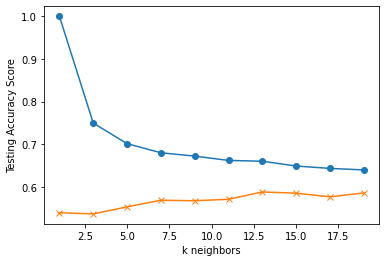

In [14]:
plt.plot(range(1, 20, 2), train_scores, marker="o")
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [15]:
# k13 provides the best accuracty where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [16]:
print("k=13 Test Acc: %.3f" % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.588


# Hyperparameter Tuning

In [17]:
# Create the GridSearchCV model
# from Machine Learning III, Exercise 9
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,9,11,13,15,17,19]}

grid2 = GridSearchCV(knn, param_grid, verbose=3)

In [18]:
# https://datascience.stackexchange.com/questions/29410/how-to-set-parameters-to-search-in-scikit-learn-gridsearchcv
# for param in grid.get_params().keys():
#     print(param)

In [19]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.557, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.544, total=   0.1s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.548, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.542, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.533, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.571, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.537, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.566, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.560, total=   0.2s
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.0s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=3)

In [20]:
print(grid2.best_params_)
print(grid2.best_score_)

{'n_neighbors': 19}
0.584395534824151


# Save the Model

In [21]:
# Save your model by updating "your_name" with your name and "your_model" with your model variable
import joblib
filename = 'saved_files/KerryHarp_KNN.sav'
joblib.dump(grid2, filename)

['saved_files/KerryHarp_KNN.sav']